In this notebook we will visualize tetrahedral meshes obtained through [Diazzi et al. 2023.](https://doi.org/10.1145/3618352).

In [1]:
import pyvista as pv
import tetgen
import numpy as np

In [2]:
import meshio

In [3]:
# pv.set_plot_theme('document')

In [18]:

# Load the OBJ file
mesh = meshio.read("meshes/bunny_remeshed.obj")

# Save as OFF file
mesh.write("meshes/bunny_remeshed.off")

In [12]:
# Convert meshio mesh to VTK format for PyVista
vtk_mesh = pv.wrap(mesh)

c:\Users\saipc\OneDrive\Desktop\SAPO-DOX\Studium\TuWien\GraphicsSeminarSS24\gs_venv\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (c:\Users\saipc\OneDrive\Desktop\SAPO-DOX\Studium\TuWien\GraphicsSeminarSS24\gs_venv\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


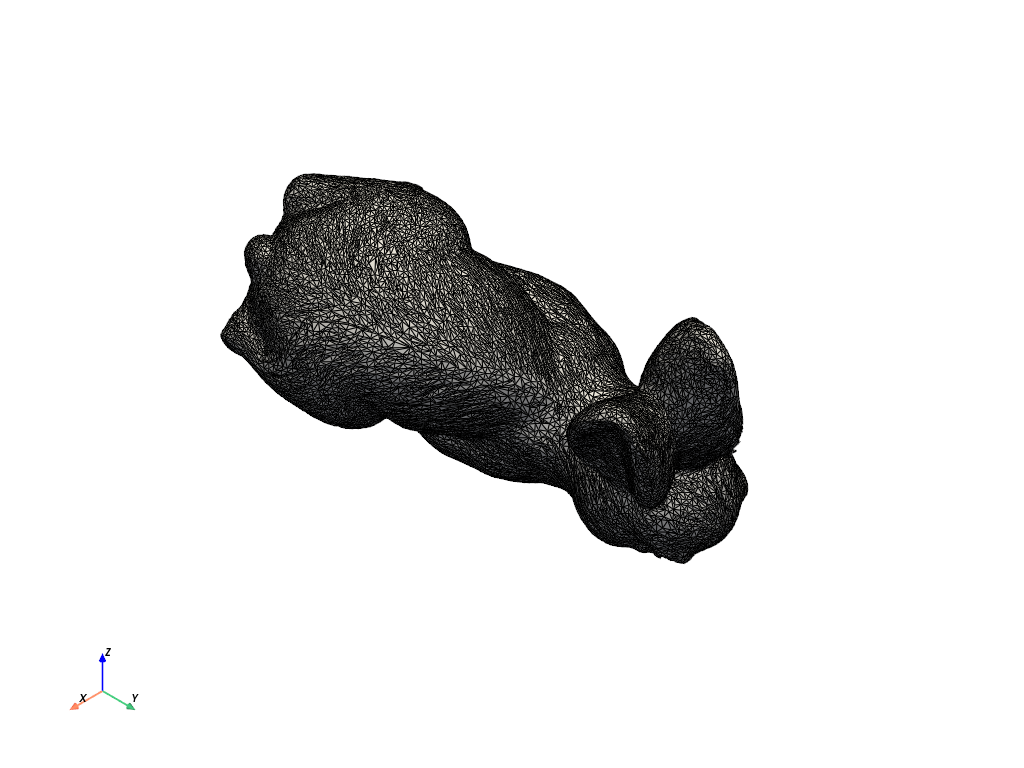

In [13]:
# Plot the mesh
vtk_mesh.plot(show_edges=True, color="white")

In [14]:
tetgen.TetGen(mesh)

TypeError: Invalid input. Must be either a pyvista.PolyData object or vertex and face arrays.

c:\Users\saipc\OneDrive\Desktop\SAPO-DOX\Studium\TuWien\GraphicsSeminarSS24\gs_venv\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (c:\Users\saipc\OneDrive\Desktop\SAPO-DOX\Studium\TuWien\GraphicsSeminarSS24\gs_venv\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


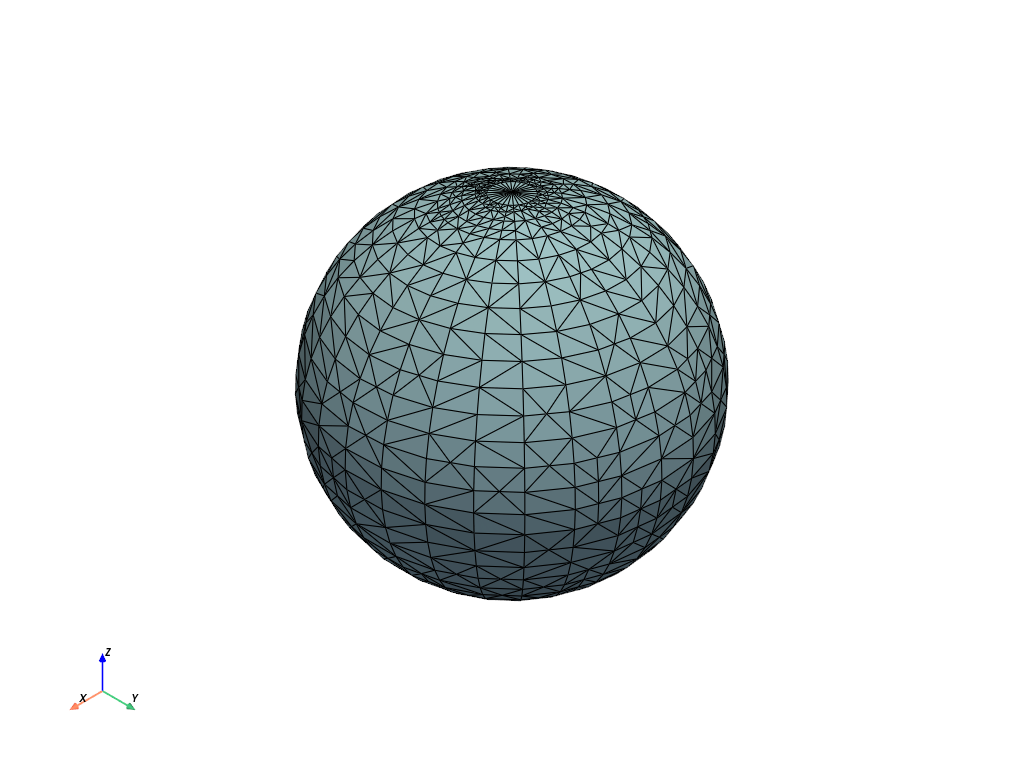

In [12]:
sphere = pv.Sphere()
tet = tetgen.TetGen(sphere)
tet.tetrahedralize(order=1, mindihedral=20, minratio=1.5)
grid = tet.grid
grid.plot(show_edges=True)

c:\Users\saipc\OneDrive\Desktop\SAPO-DOX\Studium\TuWien\GraphicsSeminarSS24\gs_venv\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (c:\Users\saipc\OneDrive\Desktop\SAPO-DOX\Studium\TuWien\GraphicsSeminarSS24\gs_venv\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


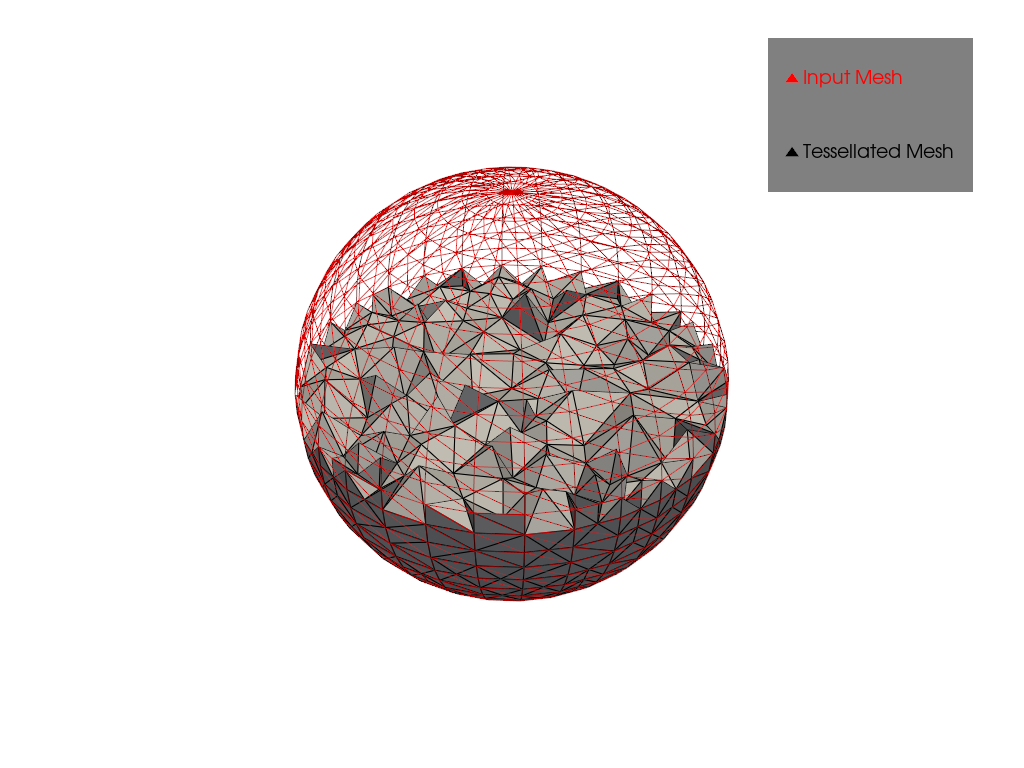

In [13]:
# get cell centroids
cells = grid.cells.reshape(-1, 5)[:, 1:]
cell_center = grid.points[cells].mean(1)

# extract cells below the 0 xy plane
mask = cell_center[:, 2] < 0
cell_ind = mask.nonzero()[0]
subgrid = grid.extract_cells(cell_ind)

# advanced plotting
plotter = pv.Plotter()
plotter.add_mesh(subgrid, 'lightgrey', lighting=True, show_edges=True)
plotter.add_mesh(sphere, 'r', 'wireframe')
plotter.add_legend([[' Input Mesh ', 'r'],
                    [' Tessellated Mesh ', 'black']])
plotter.show()